___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

import sklearn
#!pip install xgboost
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)


import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)

In [2]:
sklearn.__version__

'1.2.2'

In [3]:
xgboost.__version__

'2.0.0'

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [4]:
df_male = pd.read_csv("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr", encoding="latin-1")
df_female = pd.read_csv("https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq")

In [5]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [6]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

## Explore Data

In [7]:
df_male_copy = df_male.drop(["subjectid"], axis=1)
df_male_copy.head(1)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand


In [8]:
df_female_copy = df_female.drop(["SubjectId"], axis=1)
df_female_copy.head(1)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand


In [9]:
df = pd.concat([df_male_copy, df_female_copy], axis=0, ignore_index=True)
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 107 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: int64(98), object(9)
memory usage: 5.0+ MB


In [11]:
df.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000
mean,246.468688,1406.161338,327.374423,224.891397,1299.608767,244.19265,194.754614,399.204186,340.934245,274.735003,490.754450,72.252637,324.896506,306.636124,139.723467,1020.084707,241.619974,870.152274,608.999176,497.097561,386.04120,1477.490442,282.859097,1022.098879,251.738464,1252.013184,825.110086,621.851681,351.315920,35.132169,62.625906,22.263349,240.911338,785.914469,98.865359,263.033619,338.766645,295.010712,552.075972,467.007086,1102.049275,84.953362,203.861404,189.286585,152.182762,570.035267,196.334871,332.622940,70.756922,348.385465,385.733355,1040.059492,632.602011,412.037739,432.340804,475.512854,540.124918,483.239618,69.580422,406.479895,119.518787,375.441167,413.834707,1388.404417,113.916612,416.187047,259.192320,1129.362228,354.083553,145.072676,898.107779,866.665293,576.899967,1763.794825,1714.406065,1402.949077,1099.587179,622.198748,176.336355,789.695616,458.244562,129.617996,882.739947,1630.309492,460.524720,317.750000,914.501483,229.674028,377.003790,1031.501154,797.093935,169.002966,830.059987,17.515326,1.615030,29.761206,68.257251,174.749670
std,37.400106,79.091048,20.720018,

In [12]:
df.describe(include="O").T
# To see how many unique values in each column 
# helps in dropping the unnecessary features if we think it has too much unique values and will not help in classifying the Race

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
Ethnicity,1421,209,Mexican,357
WritingPreference,6068,3,Right hand,5350


In [13]:
# Check the missing values
df.isnull().sum().any()
# We have missing values and have to deal with it

True

In [14]:
# Check the duplicates
df.duplicated().sum()

0

In [15]:
# To help us in finding the missing values and their counts
df.info(max_cols=108)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 107 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    abdominalextensiondepthsitting  6068 non-null   int64 
 1    acromialheight                  6068 non-null   int64 
 2    acromionradialelength           6068 non-null   int64 
 3    anklecircumference              6068 non-null   int64 
 4    axillaheight                    6068 non-null   int64 
 5    balloffootcircumference         6068 non-null   int64 
 6    balloffootlength                6068 non-null   int64 
 7    biacromialbreadth               6068 non-null   int64 
 8    bicepscircumferenceflexed       6068 non-null   int64 
 9    bicristalbreadth                6068 non-null   int64 
 10   bideltoidbreadth                6068 non-null   int64 
 11   bimalleolarbreadth              6068 non-null   int64 
 12   bitragionchinarc                

In [16]:
# Because we observe it has many missing values >50% 
df.drop(columns="Ethnicity", inplace=True)

In [17]:
# To be sure we handled the missing values
df.isnull().sum().any()

False

In [18]:
# before dropping features
df.shape

(6068, 106)

In [19]:
####### Drop unnecessary features #######
# We can see from the description above "PrimaryMOS" and "SubjectNumericRace" have too much uniqe values
# "Weightlbs" and "Heightin" are duplicated and will be dropped because it is self-reported
# "Installation" where the measurement occurred will be dropped because it is unnecessary
# "Date" when the participant was measure will be dropped because it is unnecessary
# We think "Branch" and "Component" are not helpful in classifying the Race

df = df.drop(["PrimaryMOS", "SubjectNumericRace" ,"Weightlbs", "Heightin", 
                        "Installation", "Date", "Branch", "Component"], axis=1)

In [20]:
# after dropping features
df.shape

(6068, 98)

In [21]:
df.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [22]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

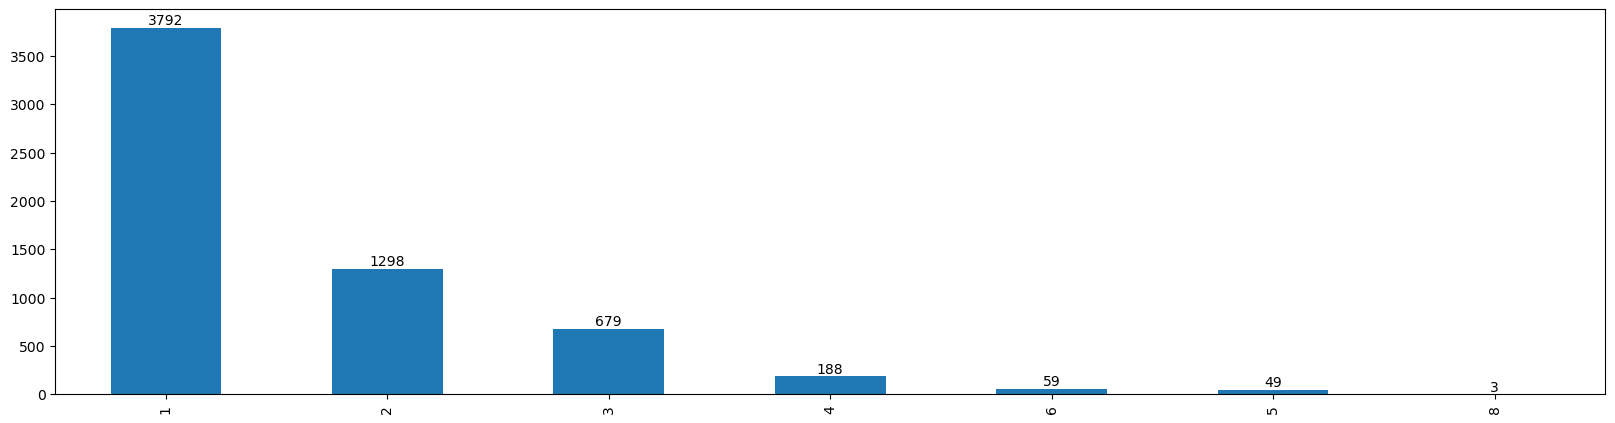

In [23]:
ax = df.DODRace.value_counts().iloc[:8].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

In [24]:
# We will drop the DODRace class if value count below 500

df_copy = df.query("DODRace in [1, 2, 3]")
df_copy.groupby("DODRace").count()
df_copy

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,1,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,1,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,2,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,1,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,2,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [25]:
# after dropping observations with DODRace class value count below 500
df_copy.shape

(5769, 98)

In [26]:
# We rename the target DODRace according to the ethnic names specified in the document to make it more understandable.

df_copy["DODRace"] = df_copy.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
    }
)
df_copy["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
          ...   
6063    Hispanic
6064    Hispanic
6065       Black
6066    Hispanic
6067    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [27]:
# Check missing values again

Nulls = 0
for column in df_copy:
    
    # Check for null values in each column
    null_values = df_copy[column].isnull().sum()
    Nulls = null_values + Nulls

# Display the null values for each column
Nulls

0

In [28]:
# To detect each missings with its cirrospending features

null_values = []

# Iterate over each column in the DataFrame
for col in df_copy.columns:
    # Calculate the number of null values in the column
    null_count = df_copy[col].isnull().sum()
    # Append the null count to the list
    null_values.append(null_count)

# Convert the list to a numpy array
null_array = np.array(null_values)

# Print the array of null values
print(null_array)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [29]:
# Check duplicates again
df_copy.duplicated().sum()

0

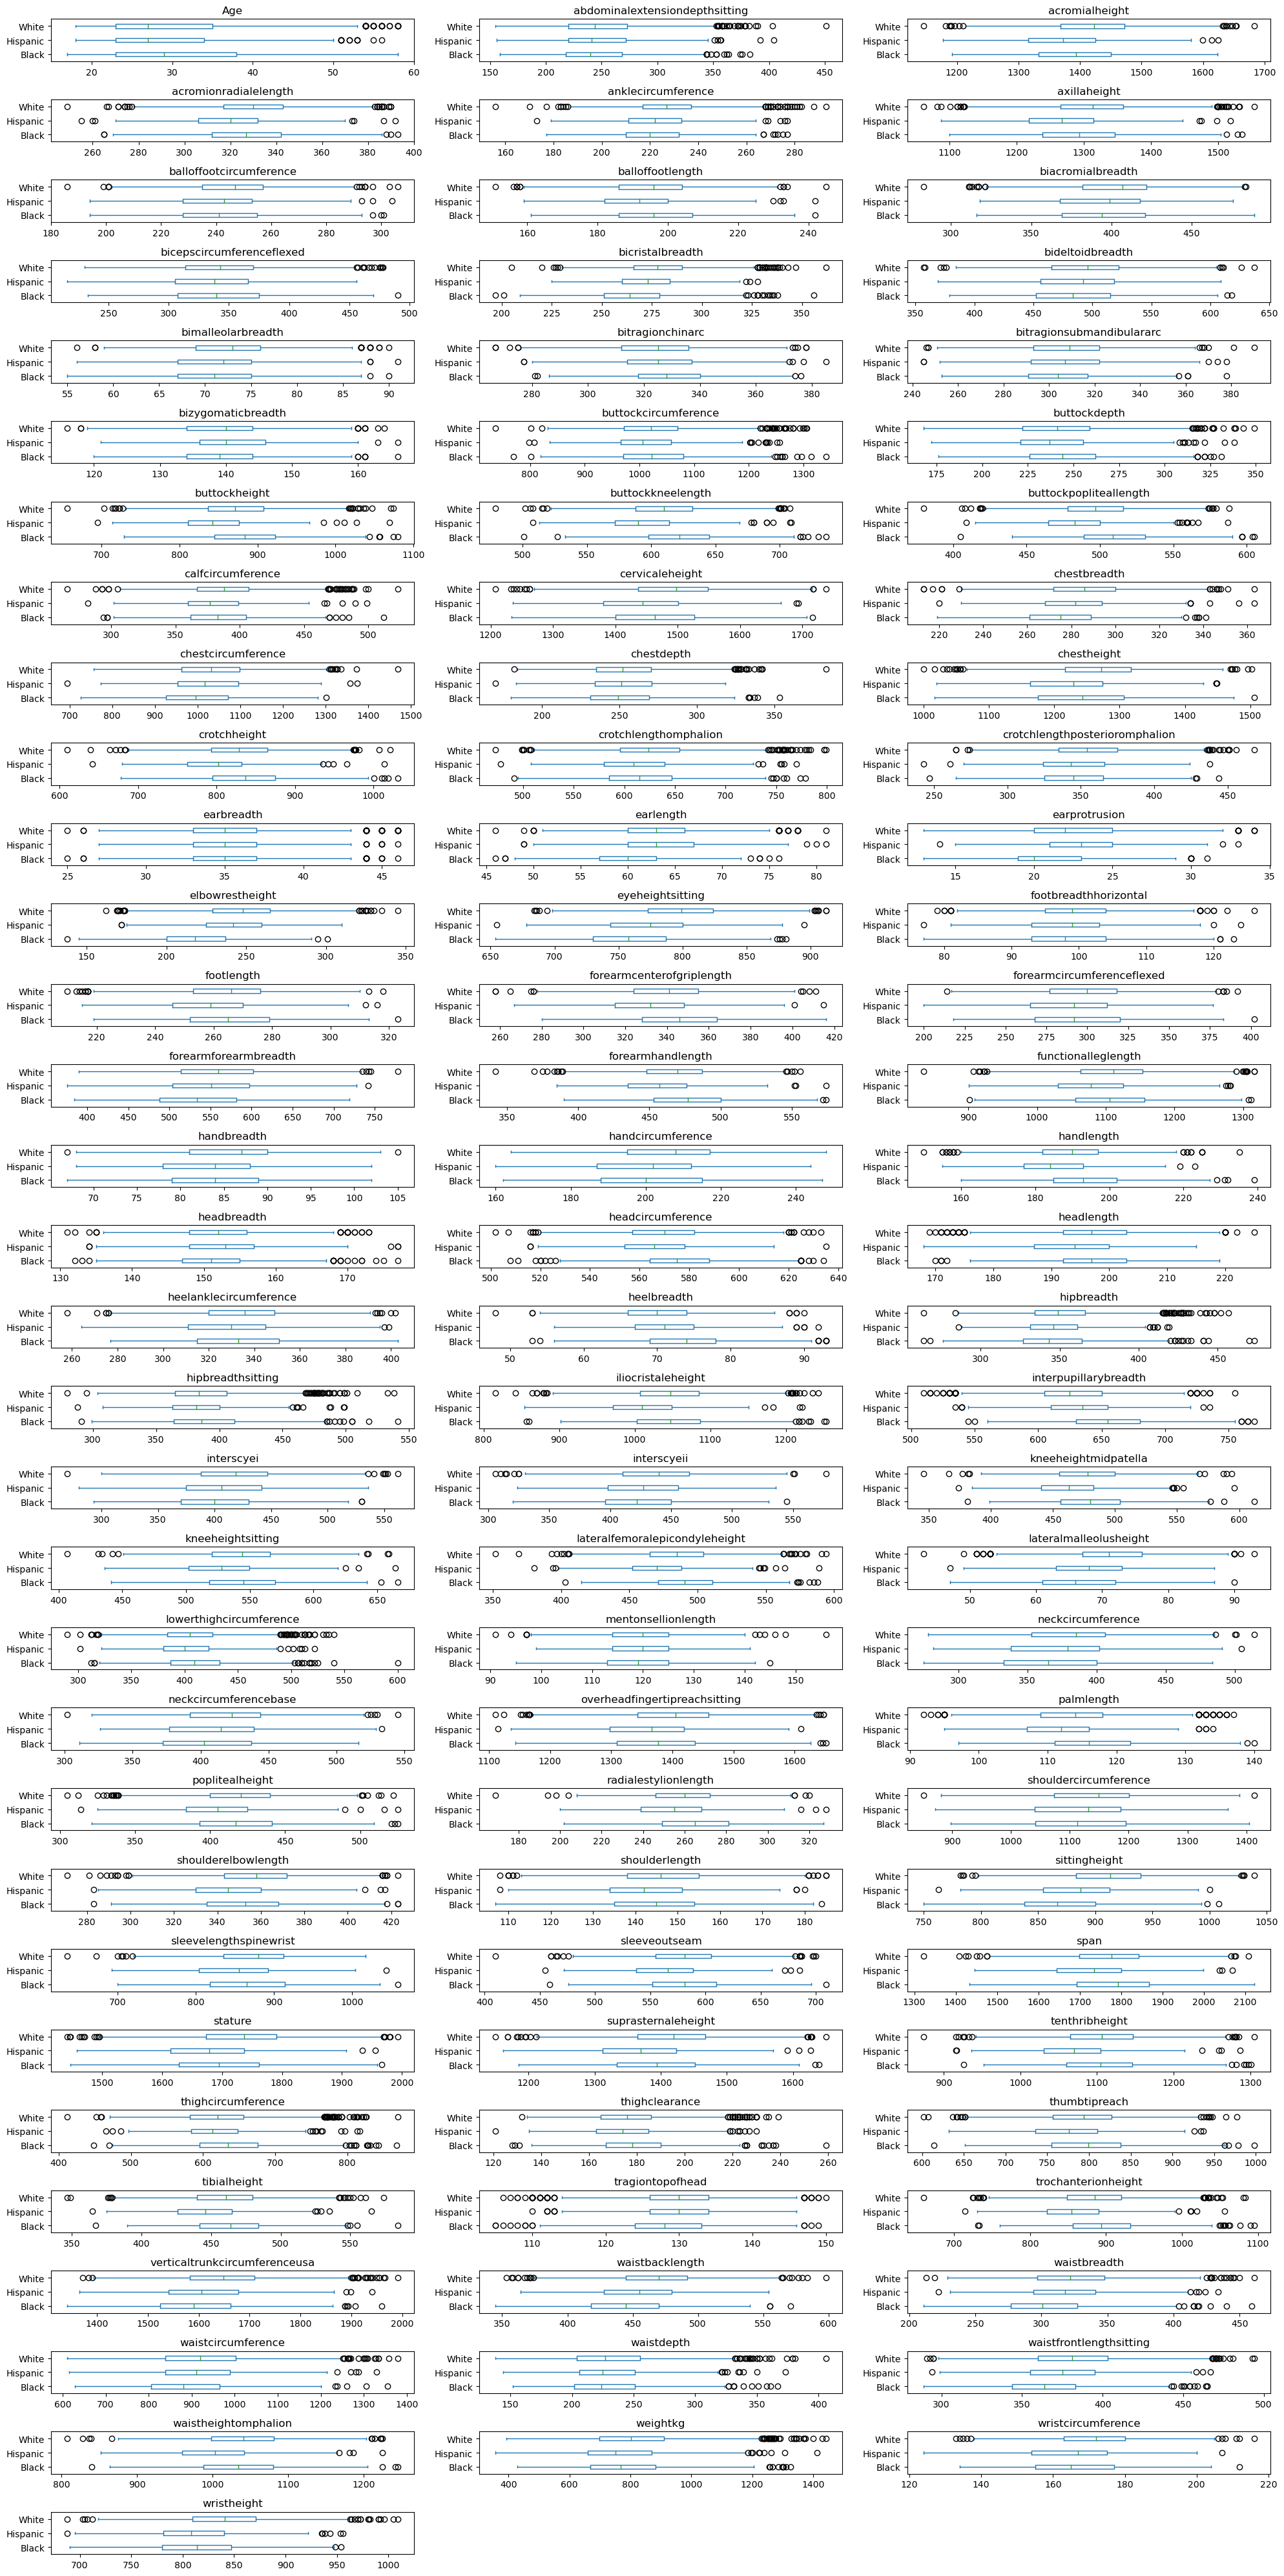

In [30]:
####### check outliers #######

df_copy.plot(by ='DODRace', kind="box", subplots=True, layout=(32, 3), figsize=(20, 40), vert=False, sharex=False, sharey=False)
plt.tight_layout();

# As we notics from the previous describtion dataframe, there are no many outliers in the data to effect the standart deviation
# since mean and standard deviation are not very close to each other.

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [31]:
X = df_copy.drop(columns=["DODRace"])
y = df_copy.DODRace

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101, stratify=y
)

In [33]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [34]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [35]:
# Encode nominal categorical features
categoricalFeatures = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), categoricalFeatures),
    remainder="passthrough",
    verbose_feature_names_out=False,
) 

column_trans = column_trans.set_output(transform="pandas")

In [36]:
sc = StandardScaler()

lr = LogisticRegression(random_state=50)

LRoperations1 = [("OneHotEncoder", column_trans), ("scaler", sc), ("logistic", lr)]

LR_model1 = Pipeline(steps=LRoperations1)

LR_model1.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression(random_state=50))])

In [37]:
eval_metric(LR_model1, X_train, y_train, X_test, y_test)

Test_Set
[[241   3  16]
 [  6  89  41]
 [ 13  21 724]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93       260
    Hispanic       0.79      0.65      0.71       136
       White       0.93      0.96      0.94       758

    accuracy                           0.91      1154
   macro avg       0.88      0.85      0.86      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 979   10   49]
 [  20  350  173]
 [  21   64 2949]]
              precision    recall  f1-score   support

       Black       0.96      0.94      0.95      1038
    Hispanic       0.83      0.64      0.72       543
       White       0.93      0.97      0.95      3034

    accuracy                           0.93      4615
   macro avg       0.91      0.85      0.88      4615
weighted avg       0.92      0.93      0.92      4615



In [37]:
f1_hispanic = make_scorer(f1_score, average=None, labels=["Hispanic"])
precision_hispanic = make_scorer(precision_score, average=None, labels=["Hispanic"])
recall_hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [38]:
CV_LRmodel1 = Pipeline(steps=LRoperations1)

scores = cross_validate(
    CV_LRmodel1, X_train, y_train, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                    0.425061
score_time                  0.020489
test_f1_hispanic            0.642562
train_f1_hispanic           0.725675
test_precision_hispanic     0.727504
train_precision_hispanic    0.820231
test_recall_hispanic        0.576296
train_recall_hispanic       0.650701
dtype: float64

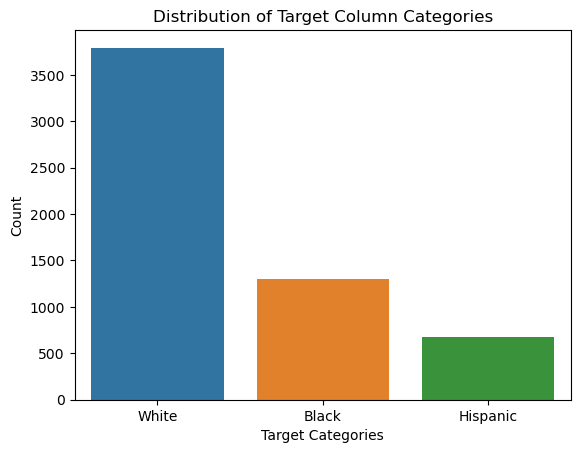

In [40]:
# demonstrate the target column distribution
sns.countplot(x="DODRace", data=df_copy)
plt.title("Distribution of Target Column Categories")
plt.xlabel("Target Categories")
plt.ylabel("Count")
plt.show()

In [39]:
# Try to maximize the Recall score by balance the data
lr = LogisticRegression(class_weight="balanced", random_state=50)

LRoperations2 = [("OneHotEncoder", column_trans), ("scaler", sc), ("logistic", lr)]

LR_model2 = Pipeline(steps=LRoperations2)

LR_model2.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(class_weight='balanced', random_state=50))])

In [40]:
eval_metric(LR_model2, X_train, y_train, X_test, y_test)

Test_Set
[[236  11  13]
 [  7 107  22]
 [ 26  89 643]]
              precision    recall  f1-score   support

       Black       0.88      0.91      0.89       260
    Hispanic       0.52      0.79      0.62       136
       White       0.95      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 983   31   24]
 [  15  463   65]
 [  57  347 2630]]
              precision    recall  f1-score   support

       Black       0.93      0.95      0.94      1038
    Hispanic       0.55      0.85      0.67       543
       White       0.97      0.87      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [41]:
CV_LRmodel2 = Pipeline(steps=LRoperations2)

scores = cross_validate(
    CV_LRmodel2, X_train, y_train, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                    0.465512
score_time                  0.021442
test_f1_hispanic            0.588149
train_f1_hispanic           0.677828
test_precision_hispanic     0.484387
train_precision_hispanic    0.558228
test_recall_hispanic        0.751279
train_recall_hispanic       0.862694
dtype: float64

### Logistic Model GridsearchCV

In [42]:

pipe_model = Pipeline(steps=LRoperations2)
param_grid = {
    "logistic__C": [ 0.1, 1],
    "logistic__penalty": ["l1", "l2"],
    "logistic__solver": ["liblinear", "saga"],
#    "logistic__class_weight": ["balanced", None],
}

Logistic_grid_search = GridSearchCV(
    pipe_model, param_grid, cv=10, scoring=recall_hispanic, n_jobs=-1, return_train_score=True
)
Logistic_grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=50))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 1],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'saga']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [43]:
Logistic_grid_search.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=1, class_weight='balanced', penalty='l1',
                                    random_state=50, solver='saga'))])

In [44]:
pd.DataFrame(Logistic_grid_search.cv_results_).loc[
    Logistic_grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.777071
mean_train_score    0.851442
Name: 5, dtype: object

In [45]:
eval_metric(Logistic_grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[242   8  10]
 [  5 110  21]
 [ 26  85 647]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       260
    Hispanic       0.54      0.81      0.65       136
       White       0.95      0.85      0.90       758

    accuracy                           0.87      1154
   macro avg       0.79      0.86      0.82      1154
weighted avg       0.89      0.87      0.87      1154


Train_Set
[[ 977   37   24]
 [  18  458   67]
 [  61  330 2643]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.56      0.84      0.67       543
       White       0.97      0.87      0.92      3034

    accuracy                           0.88      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



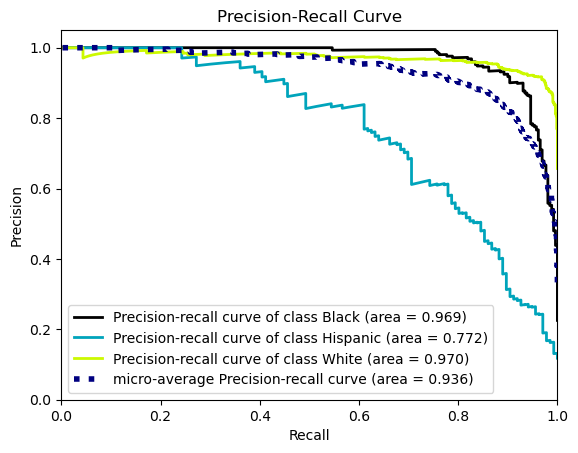

In [46]:
from scikitplot.metrics import plot_roc, plot_precision_recall

# operations = [
#     ("OneHotEncoder", column_trans),
#     ("scaler", sc),
#     ("log", LogisticRegression(C=1, class_weight='balanced', penalty='l1', random_state=50,
#                    solver='saga'))
#      ]

# model = Pipeline(steps=operations)

#model.fit(X_train, y_train)

y_pred_proba = Logistic_grid_search.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [47]:
# we can't use the average_precision_score function with the y_test variable because it's not a binary
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values  # we do that for the sake of the average_precision_score function.

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

# Returns 0 black, 1 hispanic, 2 white scores.
# We got hispanic scores by specifying 1 here.

0.7715793396934317

In [48]:
y_pred = Logistic_grid_search.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

# Since we will compare the scores we got from all models in the table below,
# we assign model scores to the variables.

## 2. SVC

### Vanilla SVC model 

In [49]:
SVCoperations1 = [("OneHotEncoder", column_trans), ("scaler", StandardScaler()), 
              ("SVC", SVC(random_state=50))]

SVC_model1 = Pipeline(steps=SVCoperations1)

SVC_model1.fit(X_train, y_train)

eval_metric(SVC_model1, X_train, y_train, X_test, y_test)

Test_Set
[[228   0  32]
 [  3  65  68]
 [  9   8 741]]
              precision    recall  f1-score   support

       Black       0.95      0.88      0.91       260
    Hispanic       0.89      0.48      0.62       136
       White       0.88      0.98      0.93       758

    accuracy                           0.90      1154
   macro avg       0.91      0.78      0.82      1154
weighted avg       0.90      0.90      0.89      1154


Train_Set
[[ 958    6   74]
 [  19  269  255]
 [  14   14 3006]]
              precision    recall  f1-score   support

       Black       0.97      0.92      0.94      1038
    Hispanic       0.93      0.50      0.65       543
       White       0.90      0.99      0.94      3034

    accuracy                           0.92      4615
   macro avg       0.93      0.80      0.84      4615
weighted avg       0.92      0.92      0.91      4615



In [50]:
scoring = {"f1_hispanic":f1_hispanic, 
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

CV_SVCmodel1 = Pipeline(steps=SVCoperations1)

scores = cross_validate(CV_SVCmodel1, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic            0.555325
train_f1_hispanic           0.645138
test_precision_hispanic     0.892313
train_precision_hispanic    0.936587
test_recall_hispanic        0.404882
train_recall_hispanic       0.492117
dtype: float64

In [51]:
#SVC with balancing

SVCoperations2 = [("OneHotEncoder", column_trans), ("scaler", StandardScaler()), 
              ("SVC", SVC(class_weight='balanced', random_state=50))]

SVC_model2 = Pipeline(steps=SVCoperations2)

SVC_model2.fit(X_train, y_train)

eval_metric(SVC_model2, X_train, y_train, X_test, y_test)

Test_Set
[[233   9  18]
 [  3 111  22]
 [ 16  89 653]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91       260
    Hispanic       0.53      0.82      0.64       136
       White       0.94      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.80      0.86      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 983   29   26]
 [  13  487   43]
 [  41  295 2698]]
              precision    recall  f1-score   support

       Black       0.95      0.95      0.95      1038
    Hispanic       0.60      0.90      0.72       543
       White       0.98      0.89      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.84      0.91      0.87      4615
weighted avg       0.92      0.90      0.91      4615



In [52]:
CV_SVCmodel2 = Pipeline(steps=SVCoperations2)

scores = cross_validate(CV_SVCmodel2, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic            0.593263
train_f1_hispanic           0.720940
test_precision_hispanic     0.498328
train_precision_hispanic    0.600309
test_recall_hispanic        0.734579
train_recall_hispanic       0.902393
dtype: float64

###  SVC Model GridsearchCV

In [53]:
param_grid = {'SVC__C': [0.01, 0.1, 1],
               'SVC__gamma': ["scale" ,0.01, 0.1],
               'SVC__class_weight': ["balanced", None]
             }

operations = [("OneHotEncoder", column_trans), ("scaler", StandardScaler()),
              ("SVC", SVC(random_state=50))]
pip_modelSVC = Pipeline(steps=operations)

SVC_grid_search = GridSearchCV(pip_modelSVC,
                              param_grid,
                              n_jobs=-1,
                              scoring=recall_hispanic,
                              cv=10,
                              return_train_score=True,
                              verbose=2)
SVC_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('SVC', SVC(random_state=50))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.01, 0.1, 1],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__gamma': ['scale', 0.01, 0.1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [54]:
SVC_grid_search.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('SVC', SVC(C=1, class_weight='balanced', random_state=50))])

In [55]:
pd.DataFrame(SVC_grid_search.cv_results_).loc[SVC_grid_search.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.734579
mean_train_score    0.902393
Name: 12, dtype: object

In [56]:
eval_metric(SVC_grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[233   9  18]
 [  3 111  22]
 [ 16  89 653]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91       260
    Hispanic       0.53      0.82      0.64       136
       White       0.94      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.80      0.86      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 983   29   26]
 [  13  487   43]
 [  41  295 2698]]
              precision    recall  f1-score   support

       Black       0.95      0.95      0.95      1038
    Hispanic       0.60      0.90      0.72       543
       White       0.98      0.89      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.84      0.91      0.87      4615
weighted avg       0.92      0.90      0.91      4615



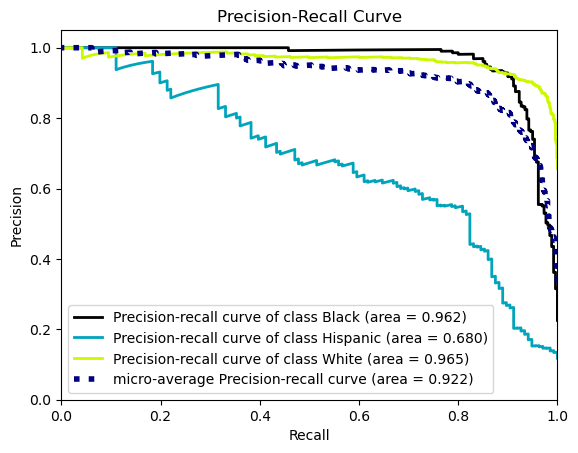

In [58]:
# operations = [
#     ("OneHotEncoder", column_trans),
#     ("scaler", StandardScaler()),
#     ("svc", SVC(C=1, class_weight="balanced", random_state=50))
# ]

# model = Pipeline(steps=operations)

# model.fit(X_train, y_train)

decision_function = SVC_grid_search.decision_function(X_test)

#y_pred_proba = SVC_grid_search.predict_proba(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

In [59]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.6803607539903437

In [60]:
y_pred = SVC_grid_search.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [61]:
from sklearn.preprocessing import OrdinalEncoder

CategoricalFeatures_ordinal = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans_Ordinal = make_column_transformer((ordinal_encoder, CategoricalFeatures_ordinal), remainder="passthrough")

In [97]:
from sklearn.ensemble import RandomForestClassifier


RFoperations1 = [("OrdinalEncoder", column_trans_Ordinal),
              ("RF_model", RandomForestClassifier(random_state=50))] 

RF_model1 = Pipeline(steps=RFoperations1)

RF_model1.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('RF_model', RandomForestClassifier(random_state=50))])

In [98]:
eval_metric(RF_model1, X_train, y_train, X_test, y_test)

Test_Set
[[193   5  62]
 [  9   6 121]
 [ 12   3 743]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       260
           1       0.43      0.04      0.08       136
           2       0.80      0.98      0.88       758

    accuracy                           0.82      1154
   macro avg       0.71      0.59      0.59      1154
weighted avg       0.78      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [99]:
scoring = {"f1_hispanic":f1_hispanic, 
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

CV_RFmodel1 = Pipeline(steps=RFoperations1)

scores = cross_validate(CV_RFmodel1, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic            0.131837
train_f1_hispanic           1.000000
test_precision_hispanic     0.643095
train_precision_hispanic    1.000000
test_recall_hispanic        0.075455
train_recall_hispanic       1.000000
dtype: float64

In [100]:
RFoperations2 = [("OrdinalEncoder", column_trans_Ordinal),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=50))]

RF_model2 = Pipeline(steps=RFoperations2)

RF_model2.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=50))])

In [101]:
eval_metric(RF_model2, X_train, y_train, X_test, y_test)

Test_Set
[[177   3  80]
 [  7   4 125]
 [  9   1 748]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       260
           1       0.50      0.03      0.06       136
           2       0.78      0.99      0.87       758

    accuracy                           0.81      1154
   macro avg       0.73      0.57      0.57      1154
weighted avg       0.78      0.81      0.76      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [102]:
CV_RFmodel2 = Pipeline(steps=RFoperations2)

scores = cross_validate(CV_RFmodel2, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic            0.089406
train_f1_hispanic           0.999898
test_precision_hispanic     0.758333
train_precision_hispanic    1.000000
test_recall_hispanic        0.047845
train_recall_hispanic       0.999796
dtype: float64

In [103]:
RFoperations3 = [("OrdinalEncoder", column_trans_Ordinal),
              ("RF_model", RandomForestClassifier(max_depth=3, class_weight="balanced", random_state=50))]

RF_model3 = Pipeline(steps=RFoperations3)

RF_model3.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        random_state=50))])

In [104]:
eval_metric(RF_model3, X_train, y_train, X_test, y_test)

Test_Set
[[197  48  15]
 [ 10  82  44]
 [ 69 282 407]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       260
           1       0.20      0.60      0.30       136
           2       0.87      0.54      0.67       758

    accuracy                           0.59      1154
   macro avg       0.60      0.63      0.57      1154
weighted avg       0.76      0.59      0.64      1154


Train_Set
[[ 790  155   93]
 [  51  338  154]
 [ 264 1003 1767]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.74      1038
           1       0.23      0.62      0.33       543
           2       0.88      0.58      0.70      3034

    accuracy                           0.63      4615
   macro avg       0.61      0.66      0.59      4615
weighted avg       0.76      0.63      0.67      4615



In [105]:
CV_RFmodel3 = Pipeline(steps=RFoperations3)

scores = cross_validate(CV_RFmodel3, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic            0.307007
train_f1_hispanic           0.335489
test_precision_hispanic     0.205938
train_precision_hispanic    0.226146
test_recall_hispanic        0.603973
train_recall_hispanic       0.650088
dtype: float64

### RF Model GridsearchCV

In [106]:
param_grid = {'RF_model__n_estimators':[50, 64, 128, 100],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.8, 1]
             }

In [107]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=50)

operations = [("OrdinalEncoder", column_trans_Ordinal),
              ("RF_model", RF_model)]

rf_model = Pipeline(steps=operations)

rf_grid_search = GridSearchCV(estimator=rf_model,
                             param_grid = param_grid,
                             scoring=recall_hispanic,
                             n_jobs = -1,
                             verbose=2)
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=50))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__max_samples': [0.8, 1],
                         'RF_model__min_samples_leaf': [2, 3, 4],
                         'RF_model__min_samples_split': [2, 3, 4],
                         'RF_model__n_estimators': [50, 64, 128, 100]},
             scoring=make_scorer(recall_score, average=None, labels=[1]),
             verbose=2)

In [108]:
rf_grid_search.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        max_features=4, max_samples=0.8,
                                        min_samples_leaf=2, n_estimators=50,
                                        random_state=50))])

In [109]:
rf_grid_search.best_score_

0.6242609582059122

In [110]:
eval_metric(rf_grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[180  66  14]
 [ 10  84  42]
 [ 80 297 381]]
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       260
           1       0.19      0.62      0.29       136
           2       0.87      0.50      0.64       758

    accuracy                           0.56      1154
   macro avg       0.58      0.60      0.54      1154
weighted avg       0.75      0.56      0.61      1154


Train_Set
[[ 713  252   73]
 [  51  340  152]
 [ 362 1064 1608]]
              precision    recall  f1-score   support

           0       0.63      0.69      0.66      1038
           1       0.21      0.63      0.31       543
           2       0.88      0.53      0.66      3034

    accuracy                           0.58      4615
   macro avg       0.57      0.61      0.54      4615
weighted avg       0.74      0.58      0.62      4615



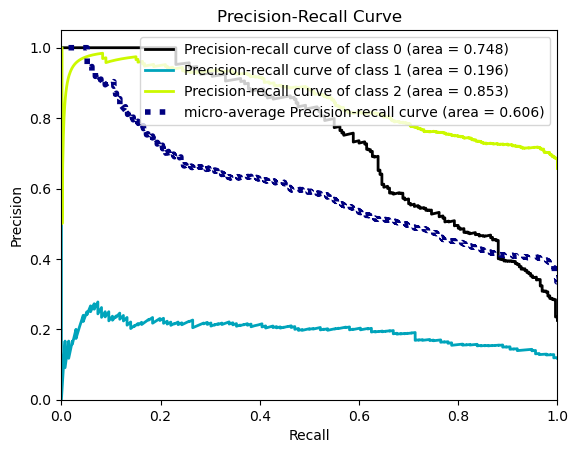

In [114]:
# operations_rf = [
#     ("OrdinalEncoder", column_trans_Ordinal),
#     (
#         "RF_model",
#         RandomForestClassifier(
#             class_weight='balanced', max_depth=2, max_features=4,
#                        max_samples=0.8, min_samples_leaf=2, n_estimators=50,
#                        random_state=50
#         ),
#     ),
# ]

# model = Pipeline(steps=operations_rf)

# model.fit(X_train, y_train)

y_pred_proba = rf_grid_search.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [115]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.12245421974360247

In [116]:
y_pred = rf_grid_search.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [117]:
from sklearn.preprocessing import OrdinalEncoder

CategoricalFeatures_ordinal = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans_Ordinal = make_column_transformer((ordinal_encoder, CategoricalFeatures_ordinal), remainder="passthrough")

In [118]:
df_copy.shape

(5769, 98)

In [119]:
# Expected: [0 1 2], got ['Black' 'Hispanic' 'White']
df_copy2 = df_copy.copy()
df_copy2["DODRace"] = df_copy2.DODRace.map({"Black": 0, "Hispanic": 1, "White": 2})

df_copy2["DODRace"]

0       2
1       2
2       0
3       2
4       0
       ..
6063    1
6064    1
6065    0
6066    1
6067    1
Name: DODRace, Length: 5769, dtype: int64

In [120]:
df_copy["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
          ...   
6063    Hispanic
6064    Hispanic
6065       Black
6066    Hispanic
6067    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [121]:
# Split the data
X2 = df_copy2.drop(["DODRace"], axis=1)
y2 = df_copy2["DODRace"]

X_train, X_test, y_train, y_test = train_test_split(
    X2, y2, test_size=0.20, random_state=42, stratify=y
)

In [122]:
xgb_classifier = XGBClassifier(random_state=50)

# Create a pipeline
XGB_model1 = Pipeline([("OrdinalEncoder", column_trans_Ordinal), ("xgboost", xgb_classifier)])

XGB_model1.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               c...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [123]:
eval_metric(XGB_model1, X_train, y_train, X_test, y_test)

Test_Set
[[220   6  34]
 [  6  54  76]
 [ 11   7 740]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       260
           1       0.81      0.40      0.53       136
           2       0.87      0.98      0.92       758

    accuracy                           0.88      1154
   macro avg       0.87      0.74      0.78      1154
weighted avg       0.88      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [124]:
# 'white':2, 'black':0, 'hispanic': 1
f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [125]:
xgb_classifier = XGBClassifier(random_state=50)

CV_XGBmodel1 = Pipeline([("OrdinalEncoder", column_trans_Ordinal),("xgboost", xgb_classifier)])

scores = cross_validate(
    CV_XGBmodel1, X_train, y_train, scoring=scoring, cv=5, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

fit_time                    2.645127
score_time                  0.026728
test_f1_hispanic            0.438850
train_f1_hispanic           1.000000
test_precision_hispanic     0.746016
train_precision_hispanic    1.000000
test_recall_hispanic        0.311230
train_recall_hispanic       1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [126]:
param_grid = {"xgboost__n_estimators":[50, 100],
              'xgboost__max_depth':[3,4],
              "xgboost__learning_rate": [0.1, 0.2],
              "xgboost__subsample":[0.5, 0.8, 1],
              "xgboost__colsample_bytree":[0.5,0.7, 1],
             "xgboost__reg_alpha": [0, 0.25, 0.5],
}

In [127]:
xgb_classifier = XGBClassifier(random_state=50)
xgb_pipe_model = Pipeline([("OrdinalEncoder", column_trans_Ordinal),("xgboost", xgb_classifier)])


param_grid = param_grid

xgb_grid_search = GridSearchCV(
    xgb_pipe_model, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True, verbose=2, n_jobs = -1)

xgb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])])),
                                       ('xgboost',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=...
                                                      num_parallel_tree=None,
                                                      random_state=50, ...))]),
             n_jobs=-1,
             param_grid={'xgboost__colsample_bytree': [0.5, 0.7, 1],
                         'xgboost__learning_rate': [0.1, 0.2],
                         'xgboost__max_depth': [3, 4],
                         'xgboost__n_estimators': [50, 100],
                         'xgboost__reg_alpha': [0, 0.25, 0.5],
                         'xgboost__subsample': [0.5, 0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]),
             verbose=2)

In [128]:
xgb_grid_search.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               c...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [129]:
pd.DataFrame(xgb_grid_search.cv_results_).loc[
    xgb_grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.359072
mean_train_score    0.692446
Name: 194, dtype: object

In [130]:
eval_metric(xgb_grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[220   5  35]
 [  7  44  85]
 [  8   7 743]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       260
           1       0.79      0.32      0.46       136
           2       0.86      0.98      0.92       758

    accuracy                           0.87      1154
   macro avg       0.86      0.72      0.75      1154
weighted avg       0.87      0.87      0.86      1154


Train_Set
[[ 989    3   46]
 [  18  349  176]
 [   7    9 3018]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1038
           1       0.97      0.64      0.77       543
           2       0.93      0.99      0.96      3034

    accuracy                           0.94      4615
   macro avg       0.96      0.86      0.90      4615
weighted avg       0.95      0.94      0.94      4615



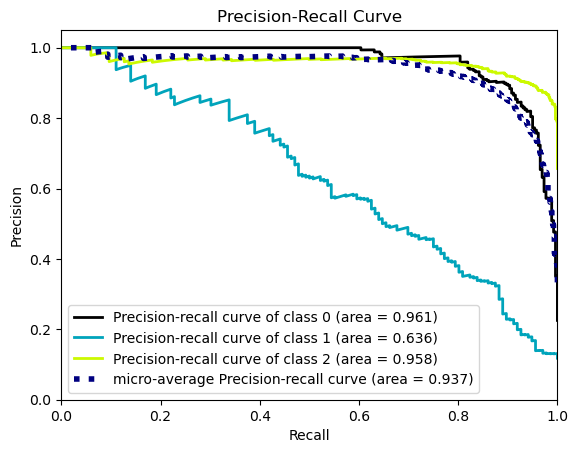

In [131]:
y_pred_proba = XGB_model1.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [132]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.12366096367678772

In [133]:
y_pred = XGB_model1.predict(X_test)

xgb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=[1])

## Comparing Models

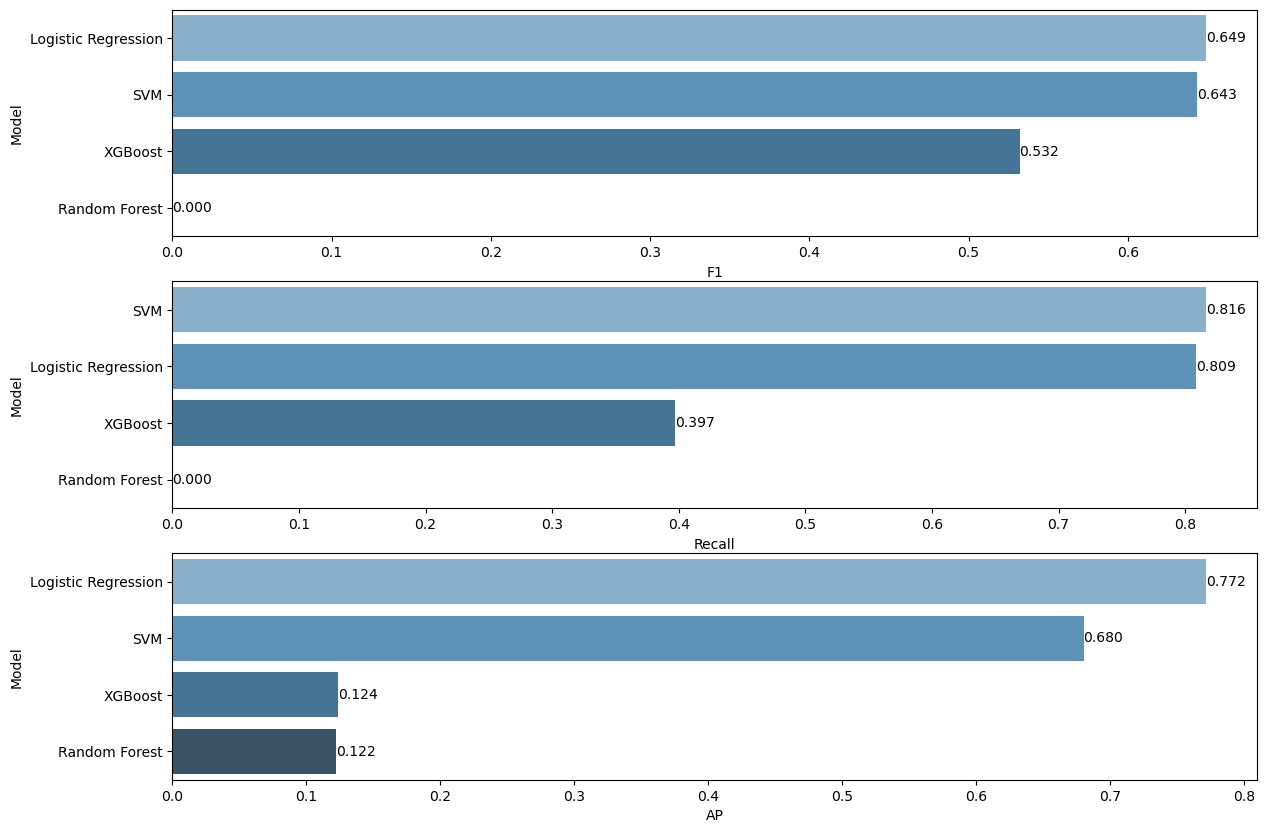

In [134]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [135]:
#### I chose SVC to build the final model beacuse, as we noted, it was the best based on the Recall metric ####
final_column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), categoricalFeatures),
    remainder="passthrough",
    verbose_feature_names_out=False,
) 

final_column_trans = column_trans.set_output(transform="pandas")

sc = StandardScaler()

svc = SVC(C=1, class_weight="balanced", random_state=50)

final_operations = [("OneHotEncoder", column_trans), ("scaler", sc), ("SVC", svc)]

final_model = Pipeline(steps= final_operations)

final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('SVC', SVC(C=1, class_weight='balanced', random_state=50))])

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [138]:
from sklearn.metrics import matthews_corrcoef
#matthews_corrcoef?
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101, stratify=y
)
y_pred = final_model.predict(X_test)
# A score of 0.5 or higher is generally considered to be good performance.
matthews_corrcoef(y_test, y_pred)

0.8180047967754734

In [139]:
from sklearn.metrics import cohen_kappa_score
#cohen_kappa_score?
#  A score between 0.81 - 1.00 can be interpereted as almost perfect agreement.
cohen_kappa_score(y_test, y_pred)

0.8119845389784041

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
#!pip install imblearn

In [140]:
# equalizes or approximates minority classes to the majority class.
from imblearn.over_sampling import SMOTE

# equalizes or converges the majority class to the minority class
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

# imblearn.pipeline is different from the pipeline library of the sklearn library.
# While the sklearn pipeline only runs the fit, transform, predict and predict_proba functions,
# imblearn.pipeline also runs the resample function.

## Logistic Regression Over/ Under Sampling

In [156]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categoricalFeatures),
    remainder=StandardScaler(),
)


In [157]:
X_train_ohe = column_trans.fit_transform(X_train)

# First, we manually transform X_train and X_test' one hot encoder.

In [158]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train_ohe, y_train)

# over_sampling(smote) and under_sampling (RandomUnderSampler) apply to X_train and y_train only.
# If it is applied to all the data and then separated into data train and test set,
# data_leakage will occur and your scores will overestimated.
# The data should be split into train and test set first and then applied only to the train data.

In [159]:
X_train_over.shape

(9102, 227)

In [160]:
y_train_over.value_counts()

# As you can see, all classes after smote are equal to the number of
# observations of the majority class, white.

# However, equating or approximating the minority class to the majority
# class will result in overfitting of the model. Therefore, the number of observations
# belonging to the minority class should be increased in a controlled manner
# to avoid overfitting.

Hispanic    3034
White       3034
Black       3034
Name: DODRace, dtype: int64

In [161]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train_ohe, y_train)

In [162]:
X_train_under.shape

(1629, 227)

In [163]:
y_train_under.value_counts()

# As you can see, all classes after RandomUnderSampler are equal to the
# number of observations in the minority class hispanic.

# Equalizing or approximating the majority class to the minority class will
# result in a very serious loss of information of the observations in
# the majority class. Even if the scores improve, this improvement will only be
# an overestimate. For this reason, a 20%-30% reduction should be done from
# the Majority class. However, if there is still no improvement in the scores,
# this rate should not be increased further.

Black       543
Hispanic    543
White       543
Name: DODRace, dtype: int64

In [164]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

# With the sampling_strategy hyperparameter, we can increase or decrease
# the classes however we want.

In [165]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [166]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [167]:
y_resampled_over.value_counts()

# With over, we doubled the number of observations in the Hispanic class.
# But we need to check below whether this increase causes overfitting.

White       3034
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [168]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [169]:
y_resampled_under.value_counts()
# We reduced the number of white observations by around 18% and equalized to 2500.

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [170]:
# We automate our over_sampling and under_sampling processes.
steps = [("o", over), ("u", under)]


pipeline = imbpipeline(steps=steps)

# First the number of hispanic cals will be increased to 1000 as per our instruction,
# and then the white class will be reduced to 2500.
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [171]:
y_resampled.value_counts()

White       2500
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [172]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [174]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categoricalFeatures),
    remainder=StandardScaler(),
)

In [176]:
operations = [
    ("OneHotEncoder", column_trans),
    ("o", over),
    ("u", under),
    ("log", LogisticRegression(random_state=50)),
] 

# When over or under sampling is applied to data, class_weight="balanced" is never used.

In [177]:
smote_pipeline = imbpipeline(steps=operations)

In [178]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(random_state=50))])

In [179]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[238   7  15]
 [  6 101  29]
 [ 19  40 699]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.68      0.74      0.71       136
       White       0.94      0.92      0.93       758

    accuracy                           0.90      1154
   macro avg       0.84      0.86      0.85      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 969   22   47]
 [  20  395  128]
 [  30  162 2842]]
              precision    recall  f1-score   support

       Black       0.95      0.93      0.94      1038
    Hispanic       0.68      0.73      0.70       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.87      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [181]:
f1_hispanic = make_scorer(f1_score, average=None, labels=["Hispanic"])
precision_hispanic = make_scorer(precision_score, average=None, labels=["Hispanic"])
recall_hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [182]:
model = imbpipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic            0.609999
train_f1_hispanic           0.708123
test_precision_hispanic     0.597239
train_precision_hispanic    0.687134
test_recall_hispanic        0.625993
train_recall_hispanic       0.730507
dtype: float64

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___